# Project: Medical Appointment Missed Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This dataset collects information
from 100k medical appointments in
Brazil and is focused on the question
of whether or not patients show up
for their appointment. A number of
characteristics about the patient are
included in each row.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


>**Selected dataset**: [No-show appointments]

**Dataset Description**: This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
- **`PatientId`**: indicates the patient ID; duplication is possible due to cases where the same patient booked more than one appointment.  
- **`AppointmentID`**: indicates appoint ID, this field should be unique
- **`Gender`**: indicates the patient's gender (M/F)     
- **`ScheduledDay`**: indicates the Date/Time the patient set up their appointment.
- **`AppointmentDay`**:  indicates the date/time the patient called to book their appointment.
- **`Age`**: indicates the patient's age.
- **`Neighborhood`**: indicates the location of the hospital.
- **`Scholarship`**: indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
- **`Hipertension`**: indicates whether or not the patient is experiencing Hypertension.
- **`Diabetes`**: indicates whether or not the patient is experiencing Diabetes.
- **`Alcoholism`**: indicates whether or not the patient is experiencing Alcoholism.
- **`Handcap`**: indicates whether or not the patient is with special needs.
- **`SMS_received`**: indicates whether or not the patient has received a reminder text message.
- **`Show-up`**: ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.

### 1. General Properties

In [2]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

The dataset includes **14** columns and **110527** data rows.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### 1. Data Cleaning

I noticed that the minimum Age is -1. This is not correct.

I used the query and drop to remove the lines with an Age < 0.

I dropped 1 line.

In [5]:
ind = df.query('Age < 0').index
df.drop(index = ind, inplace=True)

I decided to change the name of my dependent variable **No-show** to No_show to make things easier!

In [6]:
df.rename(columns={'No-show':'No_show'}, inplace=True)

Noticing that the date types for the **AppointmentDay** and **ScheduledDay** are str whereas they should be datetime, I am going to change them.




In [7]:
df.AppointmentDay = pd.to_datetime(df['AppointmentDay'])

In [8]:
df.ScheduledDay = pd.to_datetime(df['ScheduledDay'])

I will be needing a new variable I am going to name **Difference** that represents the number of days between the day of scheduling the appointment and the day of the appointment.

This calculated by substracting **ScheduleDay** from **AppointmentDay** in terms of days.

In [9]:
df['Difference'] = (df['AppointmentDay'] - df['ScheduledDay']).dt.days

In [10]:
df['Difference'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Difference, dtype: float64

Notice the **min** value of the number of days between the schedule day and the appoitment day is **-7**. 

Since the logical smallest value of **Difference** is **-1** (which means the schedule and appointment day are the same)(this is due to no time dimention for the appointment day variable) , I will remove all the rows where it is smaller than **-1**.

I dropped 5 lines.

In [11]:
df.query('Difference < -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show,Difference
27033,7.839273e+12,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-2
55226,7.896294e+12,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-2
64175,2.425226e+13,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-2
71533,9.982316e+14,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-7
72362,3.787482e+12,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-2


In [12]:
ind = df.query('Difference < -1').index
df.drop(index = ind, inplace=True)

In [13]:
df['Difference'].describe()

count    110521.000000
mean          9.184345
std          15.255153
min          -1.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Difference, dtype: float64

### 2. Missing/Duplicated/Incorrect Data Validation

In [14]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No_show           0
Difference        0
dtype: int64

In [15]:
df.duplicated().sum()

0

My dataset if nulls and duplicates **free**.

### 3. Data Preparation

because the ID columns do not have an impact on the dependent variable, I will **drop** them.

In [16]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110521 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   Gender          110521 non-null  object             
 1   ScheduledDay    110521 non-null  datetime64[ns, UTC]
 2   AppointmentDay  110521 non-null  datetime64[ns, UTC]
 3   Age             110521 non-null  int64              
 4   Neighbourhood   110521 non-null  object             
 5   Scholarship     110521 non-null  int64              
 6   Hipertension    110521 non-null  int64              
 7   Diabetes        110521 non-null  int64              
 8   Alcoholism      110521 non-null  int64              
 9   Handcap         110521 non-null  int64              
 10  SMS_received    110521 non-null  int64              
 11  No_show         110521 non-null  object             
 12  Difference      110521 non-null  int64              
dtypes: datetime64[

In [18]:
df.describe()

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Difference
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.089386,0.098271,0.197257,0.071869,0.030401,0.022231,0.321043,9.184345
std,23.109885,0.297682,0.397929,0.258272,0.171690,0.161494,0.466879,15.255153
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,14.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,178.000000


A quick data visualization to understand my data more.

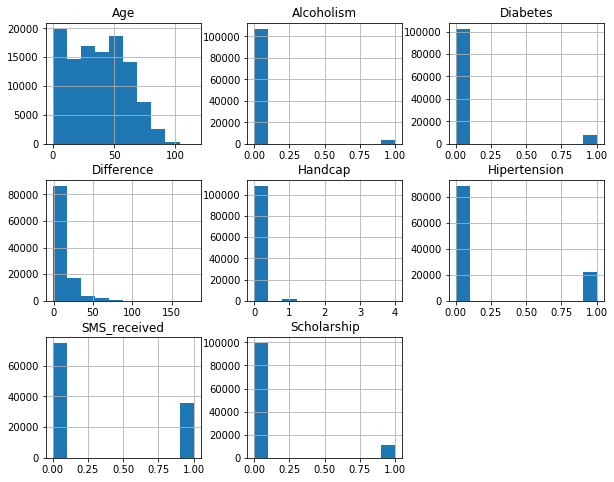

In [19]:
df.hist(figsize=(10,8));

This is the histograms of each variable in our dataset

In [20]:
a = df.No_show.value_counts()
No_shows = a[1]
No_shows

22314

I have 22314 people in my dataset who missed their appointments.

In [21]:
showed_up = df.No_show == 'No'

In [22]:
missed = df.No_show == 'Yes'

### Functions :

#### 1 - Proportion function :
- this function will be used to calculate PLOT a Bar Chart of the proportions of patients who missed their appointments by the different independent discrete variables that we have

In [23]:
def proportions(x,y,c):
    z = x/y
    ticks = np.arange(len(x))
    label = z.index
    p = plt.bar(ticks, z, tick_label = label, color='pink')
    plt.xlabel(c)
    plt.title('proportion of No-shows by %s' %c)
    plt.ylabel('proportion');
    return p

#### 2 - Grouped Bar function :
- this function will be used to PLOT a Grouped Bar Chart that displays the Number of patients who missed their appointments and the Number of patients who showed up at their appointments by the different independent discrete variables that we have.

In [32]:
def groupedbar(x,y,c):
    ticks = np.arange(len(x))
    label = x.index
    width = 0.35
    fig, ax = plt.subplots()
    rects1 = ax.bar(ticks - width/2, x, width, label='Shows', color='pink')
    rects2 = ax.bar(ticks + width/2, y, width, label='No-shows', color='purple')
    ax.set_ylabel('Number of shows and no-shows')
    ax.set_xlabel(c)
    ax.set_title('Number of shows and no-shows by %s' %c)
    ax.set_xticks(ticks)
    ax.set_xticklabels(label)
    ax.legend();

#### 3 - SMS function :
- this function is used to PLOT the number of patients who missed their appointments by the different variables (discrete and continuous) that we have for both cases where they received or did not receive an SMS 

In [33]:
def sms(x):
    df1 = df.query('SMS_received == 1')
    df1[x][missed].hist(alpha = 0.5, label = 'SMS', color = 'red')
    df2 = df.query('SMS_received == 0')
    df2[x][missed].hist(alpha = 0.5, label = 'no SMS', color = 'blue')
    plt.title('Number of No-shows by %s per SMS receiving status' %x)
    plt.xlabel(x)
    plt.ylabel('Number of No-shows')
    plt.legend();

#### 4 - Show and No Show function :
- this funtion is used to PLOT the number of patients who missed or showed up to their appointments by the the different independent continuous variable that we have.

In [34]:
def Show_and_No_Show(x):
    df[x][showed_up].hist(alpha = 0.5,  label = 'showed up', color = 'red')
    df[x][missed].hist(alpha = 0.5, label = 'missed', color = 'blue')
    plt.title('Shows and No-shows by %s' %x)
    plt.xlabel(x)
    plt.ylabel('Number of Shows and No-shows')
    plt.legend();

<a id='eda'></a>
## Exploratory Data Analysis

### Questions

1. what is the distribution of Age in our dataset and does it have an impact on missing or showing up at appointments ?
2. Does the Gender of the patient has a role in missing the appointments ?
3. which weekdays do patients attend appointments the most ?
4. Is the number of days between the scheduling day and the appointment day one of the reasons if missing appointments ?
5. Does receiving an SMS reminder reduce or increase showing up ?
6. what is effect of having a scholarship in attending the appointments ?
7. are the hipertension, diabetes, alcoholism and handcap causing any missing of appointments ?

### 1. Age

In [35]:
df.Age.median()

37.0

the median value of the Age variable in our dataset is 37 years old.

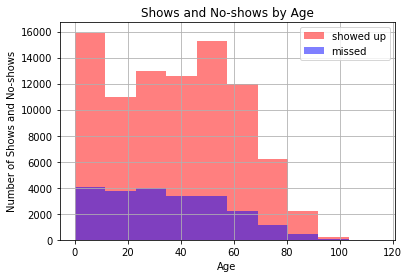

In [36]:
Show_and_No_Show('Age')

Definitely the Age variable has an impact on missing the appointments.

we can see that the distribution of age of the patients who missed their appointment is skewed to the right, meaning that patients who are older than the median tend to miss their appoitments more.

#### Answer 1:
The dependent Variable No_show depends on the Age variable. It seems to be that the patients belonging to the older categories are not showing up to all their appointments.

### 2. Gender

In [37]:
N_Gender = df['Gender'].value_counts()
N_Gender

F    71836
M    38685
Name: Gender, dtype: int64

The is the number of patients by gender.

In [38]:
No_shows_gender = df.query('No_show == "Yes"')['Gender'].value_counts()
Shows_gender = df.query('No_show == "No"')['Gender'].value_counts()

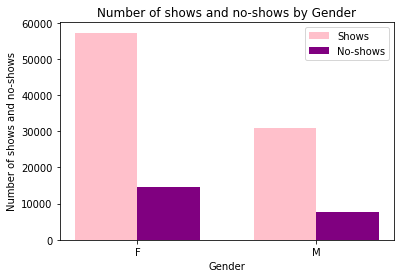

In [39]:
m = groupedbar(Shows_gender, No_shows_gender, 'Gender')

- The number of females in the dataset is larger than males.

because the number of female patients is much bigger than males, I decided to calculate the ratio of the number of patient who missed their appointments by the total number of patients, for both genders.

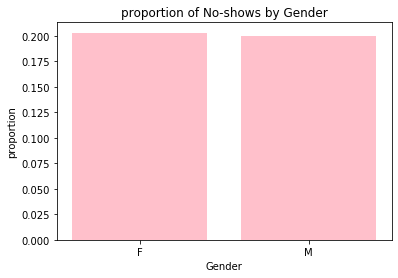

In [40]:
m = proportions(No_shows_gender,N_Gender,'Gender')

- The proportion of woman who miss their appointments is almost the same of the proportion of men.
- 20% of females miss their appointments.
- 20% of males miss their appointments.

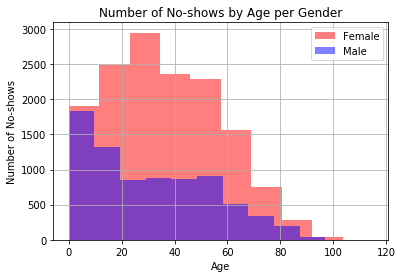

In [41]:
df.query('Gender == "F"').Age[missed].hist(alpha = 0.5, label = 'Female', color = 'red')
df.query('Gender == "M"').Age[missed].hist(alpha = 0.5, label = 'Male', color = 'blue')
plt.title('Number of No-shows by Age per Gender')
plt.xlabel('Age')
plt.ylabel('Number of No-shows')
plt.legend();

this is the distribution of age of the patients who miss their appointments for each gender.

Even though the number of No-shows per gender is different, We can say that for both genders, the number of no-shows depend on the age as patient who are older than the median miss their appointments more.

#### Answer 2:
The variable Gender seem to have an effect on the dependent variable but it is not very significant.

### 3. Appointment Day

In [42]:
df.AppointmentDay = df.AppointmentDay.dt.strftime("%A")

changing the date format to weekdays to answer question 3.

In [43]:
N_AppDay = df['AppointmentDay'].value_counts() 
N_AppDay.tolist()

[25866, 25638, 22713, 19019, 17246, 39]

This is the total number of patients by weekday.

In [44]:
No_shows_AppDay = df.query('No_show == "Yes"')['AppointmentDay'].value_counts()
Shows_AppDay = df.query('No_show == "No"')['AppointmentDay'].value_counts()

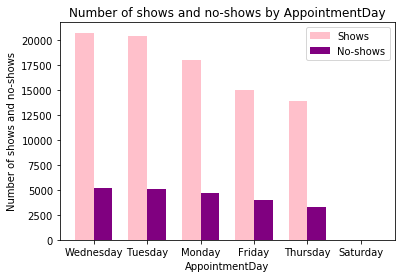

In [45]:
m = groupedbar(Shows_AppDay, No_shows_AppDay, 'AppointmentDay')

This is the Number of No-shows by weekday 

- The only significance related to the weekdays variable is that the number of the appointments scheduled differ by weekday.
- the busiest days for the clinics is Tuesday and Wednesday.
- The number of Appointments scheduled on Saturday is very low (39) comparing to other weekdays.

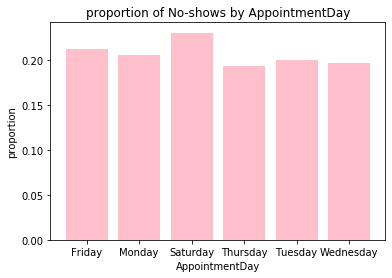

In [46]:
m = proportions(No_shows_AppDay,N_AppDay,'AppointmentDay')

Proportion of No-shows by weekday
- The rate of no-shows by the number of appointments schedules by patients on the different weekdays does not have a big significance.
- Monday : 21%
- Tuesday : 20%
- Wednesday : 20%
- Thursday : 19%
- Friday : 21%
- Saturday : 23%

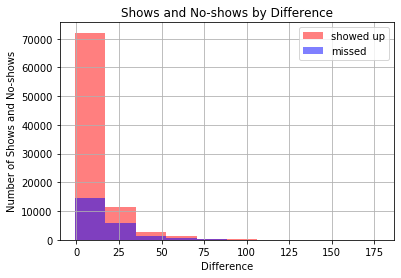

In [47]:
Show_and_No_Show('Difference')

the larger the difference of days between the schedule day and the appointement day, the less people miss their appointments.

Patient who shedule their appointment the same day, most likely they will miss it.

#### Answer 3:
there is no clear insight in the relationship between weekdays and No-shows.

#### Answer 4:
As the number of days between the schedule day and the appointment day increases, the No-shows number decreases.

### 4.SMS

In [48]:
N_SMS = df['SMS_received'].value_counts()
print(N_SMS)
N_SMS.tolist()

0    75039
1    35482
Name: SMS_received, dtype: int64


[75039, 35482]

The number of patients who received an SMS.

In [49]:
No_shows_SMS = df.query('No_show == "Yes"')['SMS_received'].value_counts()
Shows_SMS = df.query('No_show == "No"')['SMS_received'].value_counts()

The number of patients who received an SMS and missed their appointments

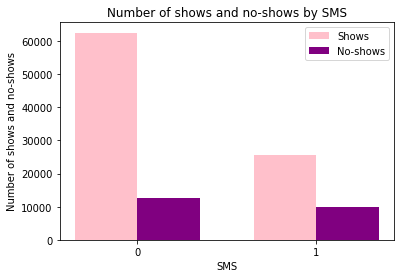

In [50]:
m = groupedbar(Shows_SMS, No_shows_SMS, 'SMS')

- The number of Shows is significantly different for the ones who received an SMS and the ones who didn't.
- The number of No-shows is rather the same for both cases.

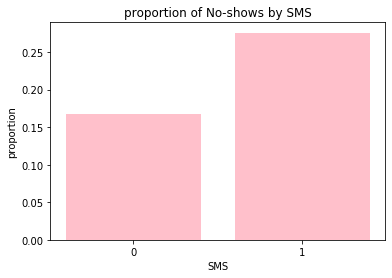

In [51]:
m = proportions(No_shows_SMS,N_SMS,'SMS')

The proportion of No-shows for the patient who receive SMS is surprisingly higher than the ones who didn't receive an SMS.
- 16% of patients who missed their appointments did not receive an SMS
- 27% of patients who missed their appointments did receive an SMS

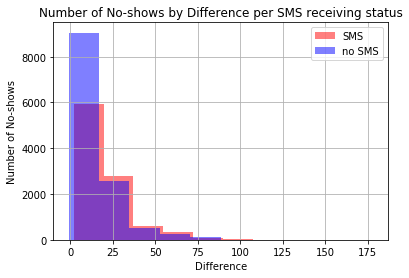

In [52]:
sms('Difference')

- Receiving an SMS of your appointment **increases** the chances of not missing your appoitment when the number of days between the schedule day and the appointment day is less than 15 days approximatly.
- Surprisingly, if the number of days between the schedule day and the appointment day is more than 15 days, receiving an SMS will **reduce** the chances of not missing your appointement

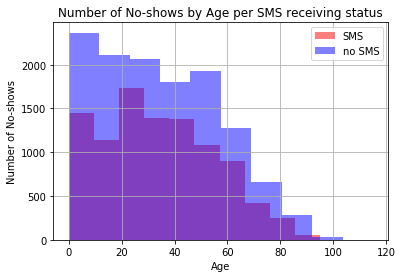

In [53]:
sms('Age')

- Receiving an SMS reminder of your appointment increases the chances of not missing your appoitment disregarding your age.

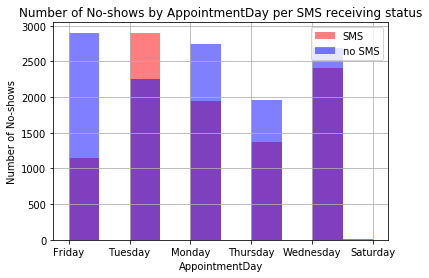

In [54]:
sms('AppointmentDay')

- An SMS works to reduce missing appointments on most of the weekdays except Tuesday, where we notice more patients who received an SMS missed their appointments than the ones who didn't receive an SMS.

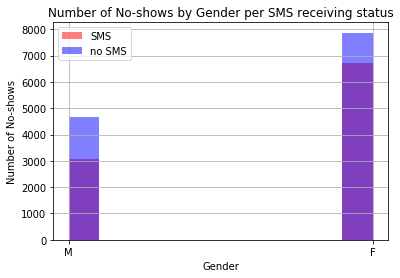

In [55]:
sms('Gender')

Receiving an SMS reminder of your appointment increases the chances of not missing your appoitment disregarding your gender.

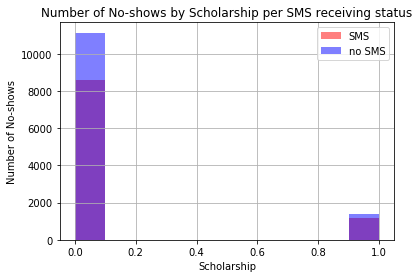

In [56]:
sms('Scholarship')

- Receiving an SMS reminder of your appointment increases the chances of not missing your appoitment disregarding your scholarship status.

#### Answer 5:
Patients who did not recieve a message and did not show up on the appointment clinic was relatively high. Patients who recived a messaged and showed to the clinic was considerably low. Which suggests that SMS  facility affects the number of patients primarily.

### 5. Scholarship

In [57]:
N_Scho = df['Scholarship'].value_counts()
print(N_Scho)
N_Scho.tolist()

0    99660
1    10861
Name: Scholarship, dtype: int64


[99660, 10861]

This is the number of patients with a Scholarship.

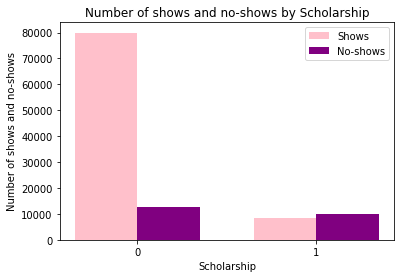

In [58]:
Shows_Scho = df.query('No_show == "No"')['Scholarship'].value_counts()
No_shows_Scho = df.query('No_show == "Yes"')['Scholarship'].value_counts()

m = groupedbar(Shows_Scho, No_shows_SMS, 'Scholarship')

This is the number of patients with a Scholarship who missed/showed-up their appointments.
- The number of patients with scholarship is very low.

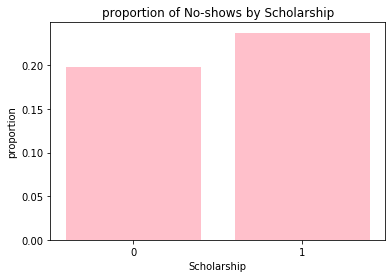

In [59]:
m = proportions(No_shows_Scho,N_Scho,'Scholarship')

The proportion of patients who received a Scholarship and missed their appointments is higher than the ones who did not receive a Scholarship and missed their appointments.
- 19% of patients who missed their appointments do not have a scholarship.
- 23% of patients who missed their appointments have a scholarship.

In [60]:
No_shows_Scho_gender = df.query('No_show == "Yes"').groupby('Gender')['Scholarship'].value_counts()
No_shows_Scho_gender

Gender  Scholarship
F       0              12485
        1               2106
M       0               7251
        1                472
Name: Scholarship, dtype: int64

This is the matrix of Number of patients with scholarship by gender.

#### Answer 6:
- people with scholarship miss their appointments more than the ones with no scholarship.

### 6. Hipertension

In [61]:
N_hiper = df['Hipertension'].value_counts()
print(N_hiper)
N_hiper.tolist()

0    88720
1    21801
Name: Hipertension, dtype: int64


[88720, 21801]

This is the number of patients with Hipertension.

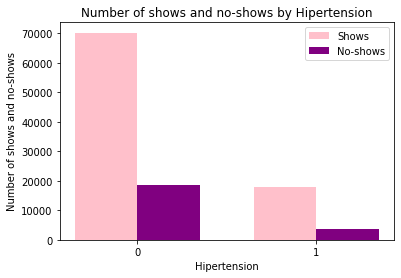

In [62]:
Shows_Hiper = df.query('No_show == "No"')['Hipertension'].value_counts()
No_shows_Hiper = df.query('No_show == "Yes"')['Hipertension'].value_counts()

m = groupedbar(Shows_Hiper,No_shows_Hiper,'Hipertension')

This is the number of patients with/without Hipertension who missed/showed-up their appointments.
- The number of patients with hipertension is much less than the ones without 

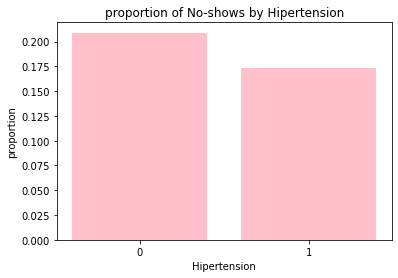

In [63]:
m = proportions(No_shows_Hiper,N_hiper,'Hipertension')

- The proportions show that patients with hipertension miss their appointments less than the ones who do not have hipertension.
- 17% Hipertension patients don't show up
- 21% Hipertension-free patients don't show up

#### Answer 7 : Hipertension
- Patients who suffer from Hipertension show to their appointments more than the ones who don't suffer from it.

### 7.Diabetes

In [64]:
N_diab = df['Diabetes'].value_counts()
N_diab

0    102578
1      7943
Name: Diabetes, dtype: int64

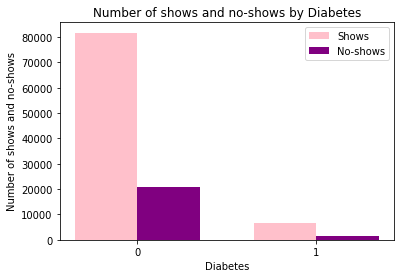

In [65]:
Shows_Diab = df.query('No_show == "No"')['Diabetes'].value_counts()
No_shows_Diab = df.query('No_show == "Yes"')['Diabetes'].value_counts()

m = groupedbar(Shows_Diab,No_shows_Diab,'Diabetes')

This is the number of patients with/without Diabetes who missed/showed-up to their appointments.
- The number of patients with diabetes is much smaller than the ones without.

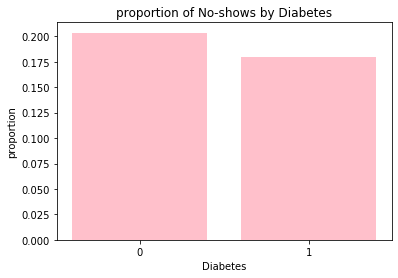

In [66]:
m = proportions(No_shows_Diab,N_diab,'Diabetes')

- Patients with diabetes are less likely to miss their appointments.
- 18% Diabetes patients don't show up
- 20% Diabetes-free patients don't show up

#### Answer 7 : Diabetes
- Patients with Diabetes Show up more and don't miss their appointments.

### 8.Alcoholism

In [67]:
N_alco =df['Alcoholism'].value_counts()
N_alco

0    107161
1      3360
Name: Alcoholism, dtype: int64

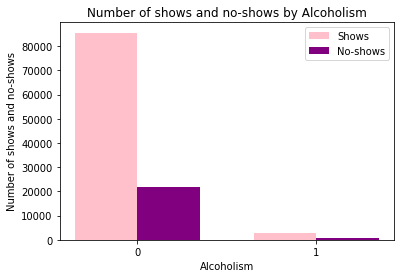

In [68]:
Shows_Alco = df.query('No_show == "No"')['Alcoholism'].value_counts()
No_shows_Alco = df.query('No_show == "Yes"')['Alcoholism'].value_counts()

m = groupedbar(Shows_Alco,No_shows_Alco,'Alcoholism')

The number of patients with alcoholism is very low in this dataset.

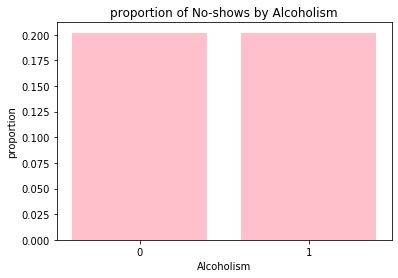

In [69]:
m = proportions(No_shows_Alco,N_alco,'Alcoholism')

There is no difference between patients with Alcoholism and patients without it it terms of missing appointments.
- 20% of Alcoholism patients don't show up.
- 20% of Patients without Alcoholism don't show up.

#### Answer 7 : Alcoholism
Alcoholism does not have an effect on patients who show up or miss their appointments.

### 9.Handcap

In [70]:
N_hand =df['Handcap'].value_counts()
N_hand

0    108282
1      2040
2       183
3        13
4         3
Name: Handcap, dtype: int64

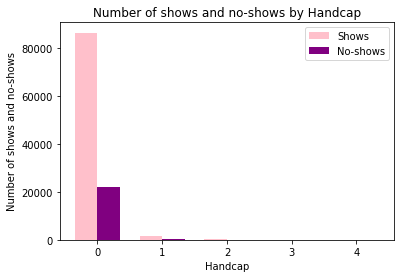

In [71]:
Shows_Hand = df.query('No_show == "No"')['Handcap'].value_counts()
No_shows_Hand = df.query('No_show == "Yes"')['Handcap'].value_counts()

m = groupedbar(Shows_Hand,No_shows_Hand,'Handcap')

The number of patients without Handcap is significantly higher.
- the number of patients with handcap type 1 is higher than other types.

In [72]:
z = No_shows_Hand/N_hand
z

0    0.202333
1    0.178431
2    0.202186
3    0.230769
4    0.333333
Name: Handcap, dtype: float64

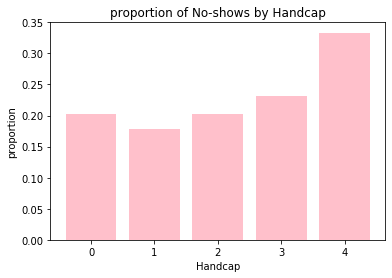

In [73]:
m = proportions(No_shows_Hand,N_hand,'Handcap')

The proportion of patients with the different types of handcap who miss their appointments varries from one type to another as :
- No Handcap : 20%
- Type 1 : 18%
- Type 2 : 20&
- Type 3 : 23%
- Type 4 : 33%

#### Answer 7 : Handcap
- Patients with handcap (except Type 1) miss their appointments more than patients with no handcap.
- Handcap Type 4 has the highest effect on showing up to the appointments on patients with 33%.
- Handcap reduces the chances than patients will show up to their appointments.

<a id='conclusions'></a>
## Conclusions


### Limitations :

- this analysis is not meant to be providing a final conclusion on the reasons leading to patients missing their appointments as it doesn't involve using any inferential statistics techniques and machine learning algorithms.
- most of the calculations done in this project were based on proportions of patients and not the numbers.
- There was no information about the Time of the appointments and the time of the scheduling which I think has a big effect on showing up or missing an appointment.
- Due to no information about the appointment's time, I had to accept the difference between the day of the schedule and the appointment day minimum to be -1.
- As I was not able to obtain sufficient explanation on specific cases where data was not consistent, we've excluded 6 lines of my dataset.

#### Question 1.
-Our dependent Variable No_show depends on the Age variable. It seems to be that the patients belonging to the older categories are not showing up to all their appointments. 
#### Question 2.
-The variable Gender does not seem to have an effect on the dependent variable No_show.
#### Question 3.
-The most important weekday in which the number of appointments is the highest is Tuesday. But the proportion of No-shows by weekday is almost the same. Which means there is no clear insight in the relationship between weekday and No-shows count.
#### Question 4.
-As observed, the more the appointment day is far from the schedule day the better. Appointments scheduled on the same day are high likely to be missed.
#### Question 5.
-The proportion of No-shows for the patient who receive SMS is surprisingly higher than the ones who didn't receive an SMS.
Although receiving an SMS will increase the chances of showing up to the appointment disregrading the Age, Scholarship status, Gender and weekdays(except Tuesday), if the number of days between the schedule day and the appointment day is more than 15 days, receiving an SMS will reduce the chances of not missing your appointement
#### Question 6.
-people with scholarship miss their appointments more than the ones with no scholarship.
#### Question 7.
- Patients who suffer from Diabetes, Hipertension show up more to their appointments.
- Alcoholism has no effect on shows and no-shows of the patients to their appointments.
- Handcap patients have higher rate of not showing up to their appointments, with different rate for each type and a highest rate of 33% (of no-shows) for the type4.